<a href="https://colab.research.google.com/github/pankajmahato907/AI_Workshops/blob/main/AI_ML_Workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For Uploading directly Zip files to the colab we can use this code:-
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [2]:
#import zipfile
#with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#   zip_ref.extractall(directory_to_extract_to)

In [17]:
pip install keras tensorflow

In [4]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [5]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
 return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
 return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
 x -= learning_rate * gradient(x)
print(f"x: {x}, f(x): {f(x)}")

x: 0.5368709120000001, f(x): 0.2882303761517119


In [6]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
 y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


In [7]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.04197263717651367
TensorFlow Time: 0.11498188972473145


In [8]:
#from tensorflow.keras.layers import Dense, sigmoid
#layer = Dense(64, activation=’sigmoid’)

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


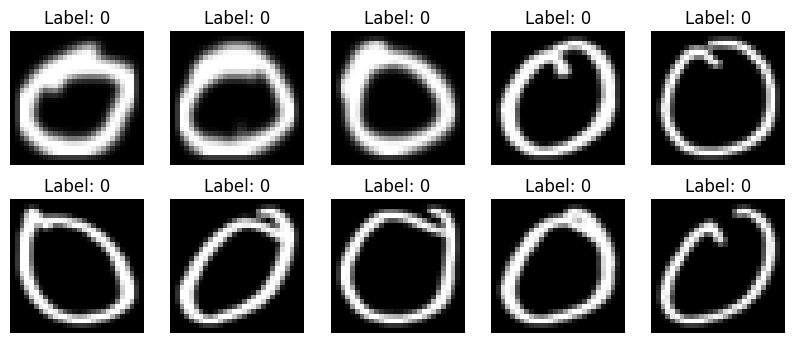

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

# Define dataset paths
train_dir = "/content/drive/MyDrive/AI_ML_Sem6/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI_ML_Sem6/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [13]:
x_train = x_train.reshape(-1, img_height, img_width, 1)
# Use with Cautions.

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28,1)
x_test = x_test.reshape(-1, 28 * 28,1)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
  # Input layer
  inputs = keras.Input(shape=input_shape)
  # Flatten layer
  x = keras.layers.Flatten()(inputs)
  # Hidden layers
  x = keras.layers.Dense(64, activation="sigmoid")(x)
  x = keras.layers.Dense(128, activation="sigmoid")(x)
  x = keras.layers.Dense(256, activation="sigmoid")(x)
  # Output layer
  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
  # Create model
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [18]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1074 - loss: 2.2668 - val_accuracy: 0.0000e+00 - val_loss: 4.0232
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1233 - loss: 2.1884 - val_accuracy: 0.0000e+00 - val_loss: 4.4417
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1329 - loss: 2.1814 - val_accuracy: 0.0000e+00 - val_loss: 4.7035
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1260 - loss: 2.1821 - val_accuracy: 0.0000e+00 - val_loss: 4.8935
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1246 - loss: 2.1814 - val_accuracy: 0.0000e+00 - val_loss: 5.0241


In [19]:
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

In [20]:
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1381 - loss: 2.1775 - val_accuracy: 0.0000e+00 - val_loss: 5.1279
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1379 - loss: 2.1783 - val_accuracy: 0.0000e+00 - val_loss: 5.2217
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1345 - loss: 2.1750 - val_accuracy: 0.0000e+00 - val_loss: 5.3039
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1368 - loss: 2.1774 - val_accuracy: 0.0000e+00 - val_loss: 5.4060
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1538 - loss: 2.1758 - val_accuracy: 0.0000e+00 - val_loss: 5.4663


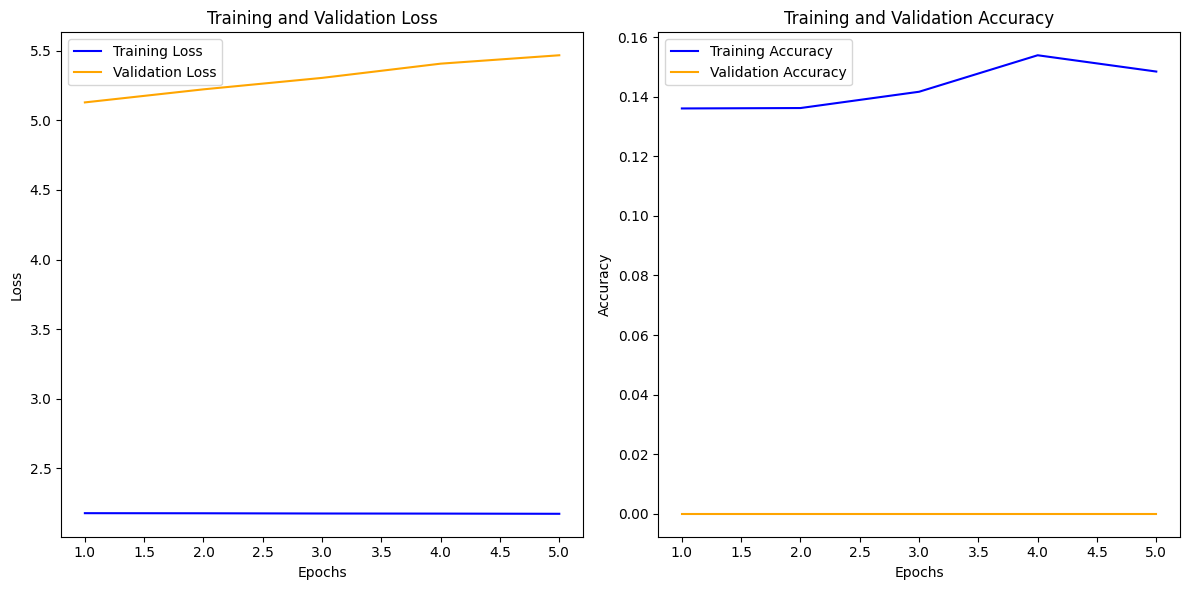

In [23]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1745 - loss: 2.1742 - val_accuracy: 0.0000e+00 - val_loss: 5.5234
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1574 - loss: 2.1710 - val_accuracy: 0.0000e+00 - val_loss: 5.5903
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1635 - loss: 2.1712 - val_accuracy: 0.0000e+00 - val_loss: 5.6487
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1446 - loss: 2.1688 - val_accuracy: 0.0000e+00 - val_loss: 5.6562
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1947 - loss: 2.1720 - val_accuracy: 0.0000e+00 - val_loss: 5.7595


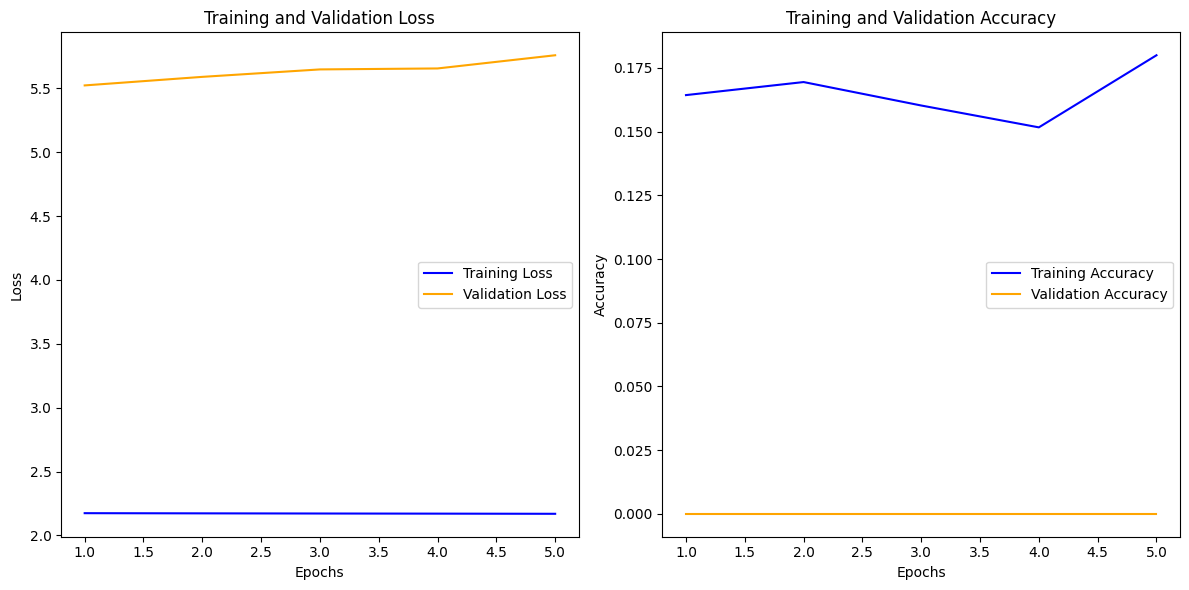

In [26]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy (only if available)
if train_acc and val_acc:
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 1s - 12ms/step - accuracy: 0.1000 - loss: 2.7068
Test accuracy: 0.1000


In [31]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted label for first image: 4
True label for first image: 0


In [32]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label for first image: 4
True label for first image: 0


In [35]:
model.save('mnist_fully_connected_model.h5')


In [39]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')
